In [6]:
import pandas as pd
iris_data = pd.read_csv(r'E:\data set\task16\iris.csv')

iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


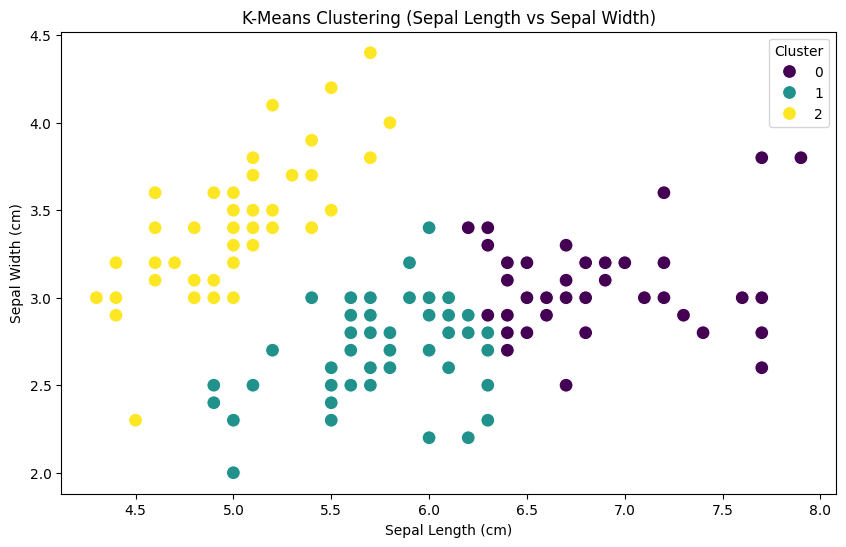

Actual Species,Setosa,Versicolor,Virginica
Cluster,,,
0,0,12,35
1,0,38,15
2,50,0,0


In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select two features for clustering
X = iris_data[['sepal.length', 'sepal.width']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # We know there are 3 species
iris_data['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal.length', y='sepal.width', hue='cluster', data=iris_data, palette='viridis', s=100)
plt.title('K-Means Clustering (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')
plt.show()

# Compare clusters with actual species labels
pd.crosstab(iris_data['cluster'], iris_data['variety'], rownames=['Cluster'], colnames=['Actual Species'])


Choosing the Optimal Number of Clusters


Objective: Use the Elbow Method and Silhouette Score to determine the optimal number of clusters.



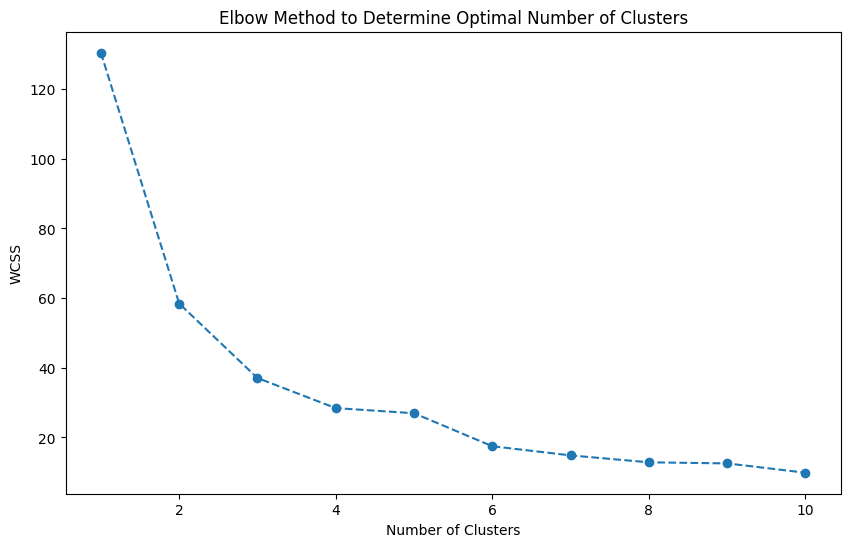

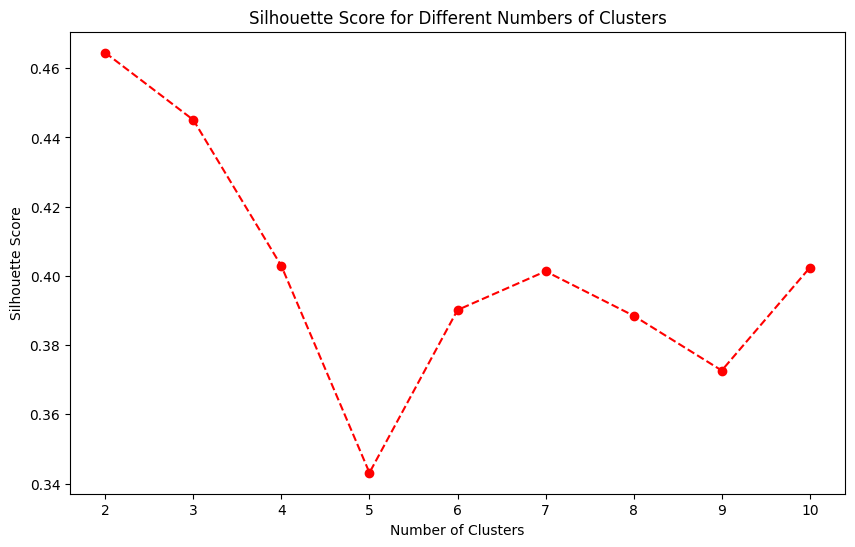

In [8]:
from sklearn.metrics import silhouette_score

# Elbow Method: Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score: Calculate for each number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='red')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


Cluster Visualization with PCA


 Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions. Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.

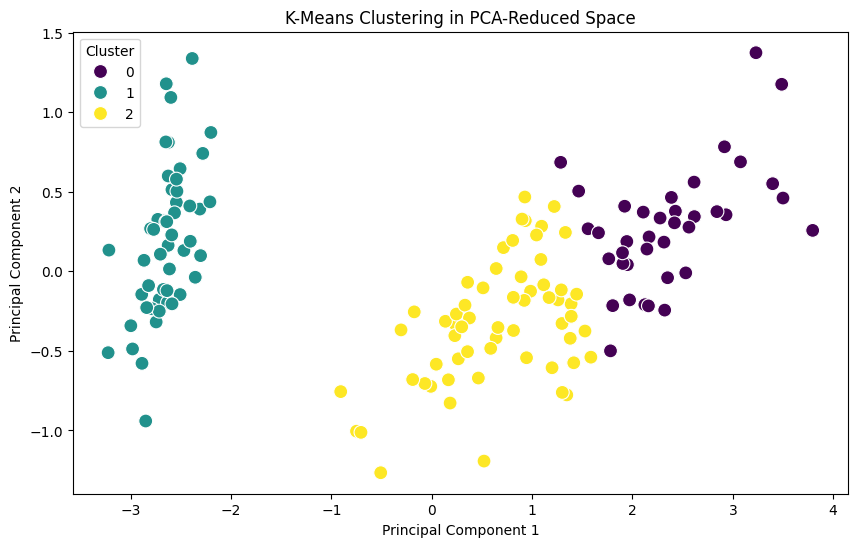

In [9]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the dataset to two dimensions
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])

# Apply K-Means clustering to the PCA-reduced dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
iris_data['pca_cluster'] = kmeans_pca.fit_predict(iris_pca)

# Visualize the clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=iris_data['pca_cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering in PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Hierarchical Clustering: Dendrogram
 

Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.

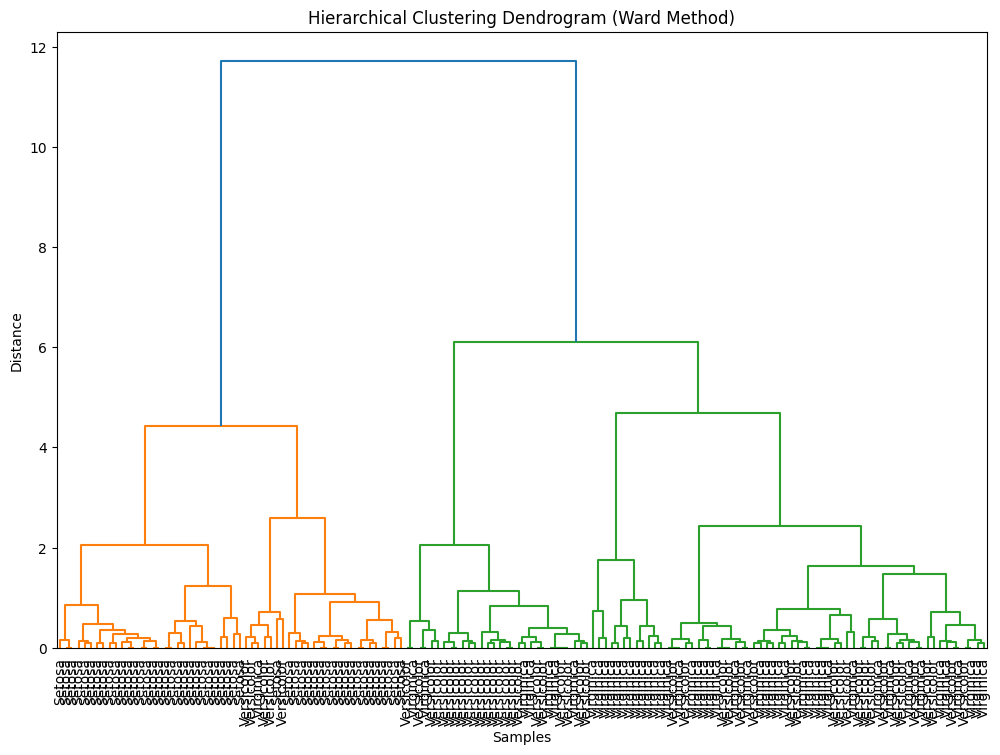

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=iris_data['variety'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


omparing Clustering Algorithms


Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach.

K-Means ARI: 0.60
Agglomerative Clustering ARI: 0.51


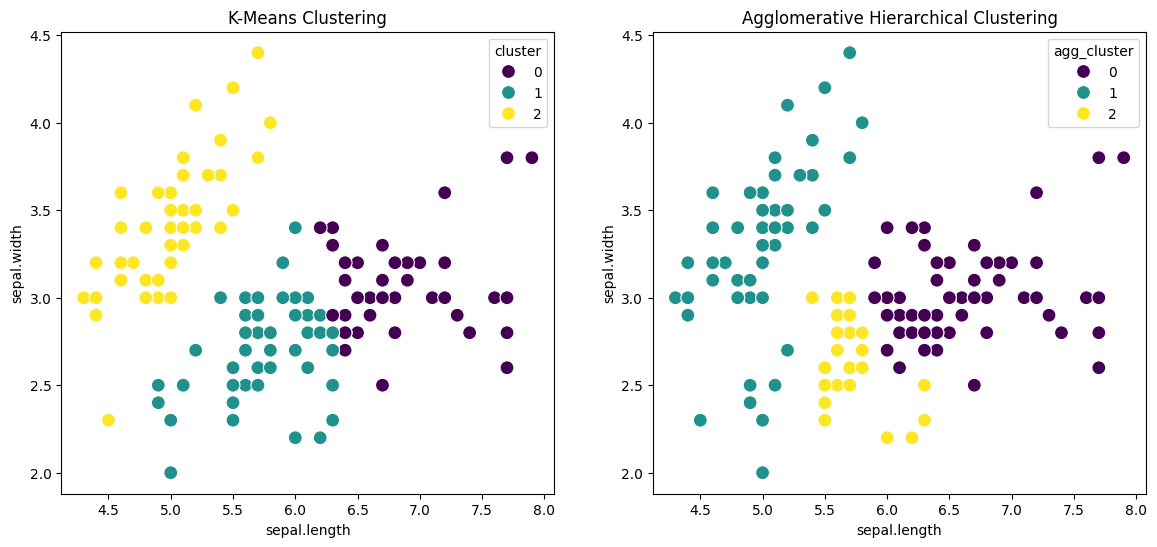

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
iris_data['agg_cluster'] = agg_clustering.fit_predict(X)

# Compare the clusters using Adjusted Rand Index
kmeans_ari = adjusted_rand_score(iris_data['variety'], iris_data['cluster'])
agg_ari = adjusted_rand_score(iris_data['variety'], iris_data['agg_cluster'])

print(f"K-Means ARI: {kmeans_ari:.2f}")
print(f"Agglomerative Clustering ARI: {agg_ari:.2f}")

# Visual comparison of clustering results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal.length', y='sepal.width', hue='cluster', data=iris_data, palette='viridis', s=100)
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x='sepal.length', y='sepal.width', hue='agg_cluster', data=iris_data, palette='viridis', s=100)
plt.title('Agglomerative Hierarchical Clustering')

plt.show()
